In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.linspace(0, 2 * np.pi, 50)  # Training points
y = np.sin(X) + 0.2 * np.random.randn(len(X))  # Noisy sine wave
X_test = np.linspace(0, 2 * np.pi, 200)  # Test points for visualization


def rbf_kernel(x1, x2, gamma=0.1):
    return np.exp(-gamma * (x1 - x2)**2)

gamma = 0.1
K = np.zeros((len(X), len(X)))
for i in range(len(X)):
    for j in range(len(X)):
        K[i, j] = rbf_kernel(X[i], X[j], gamma)
        
lambda_val = 0.1
alpha = np.linalg.inv(K + lambda_val * np.eye(len(X))) @ y

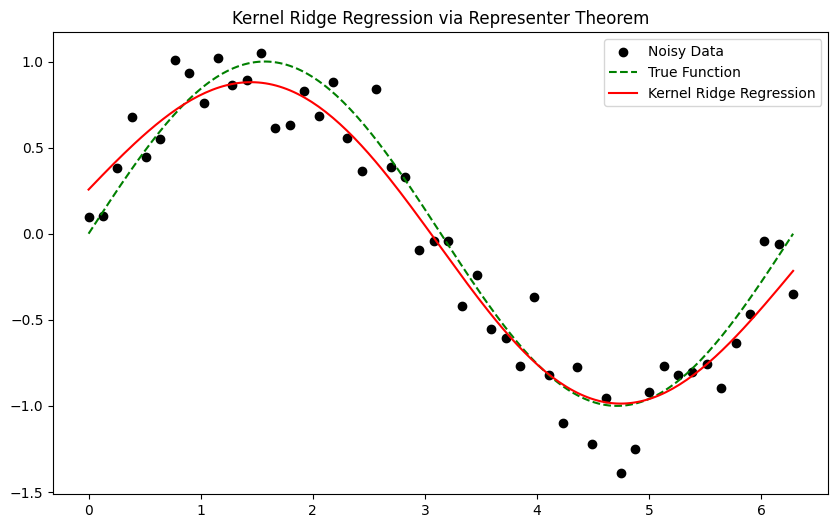

In [8]:
# Compute predictions using the Representer Theorem
K_test = np.array([[rbf_kernel(x, X[j], gamma) for j in range(len(X))] for x in X_test])
y_pred = K_test @ alpha

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Noisy Data')
plt.plot(X_test, np.sin(X_test), '--', label='True Function', color='green')
plt.plot(X_test, y_pred, label='Kernel Ridge Regression', color='red')
plt.title("Kernel Ridge Regression via Representer Theorem")
plt.legend()
plt.show()

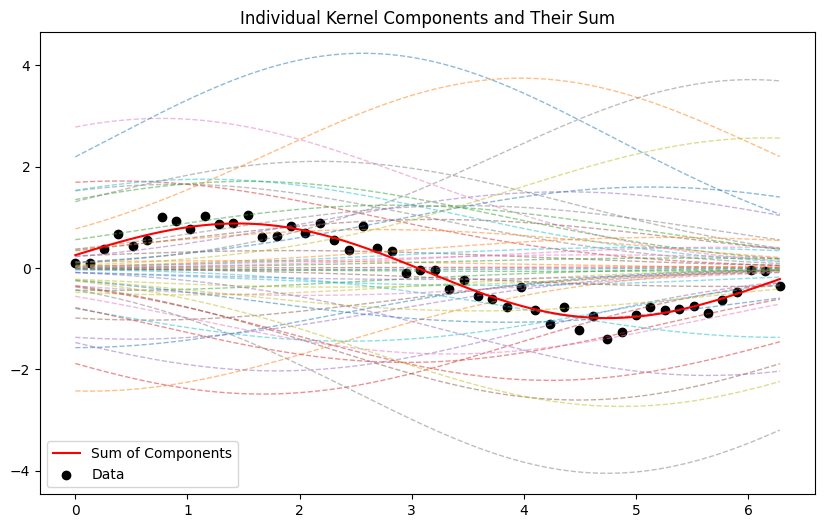

In [9]:
# Plot individual kernel components
plt.figure(figsize=(10, 6))
for i in range(len(X)):
    component = alpha[i] * np.array([rbf_kernel(x, X[i], gamma) for x in X_test])
    plt.plot(X_test, component, '--', alpha=0.5, linewidth=1)

plt.plot(X_test, y_pred, 'r-', label='Sum of Components')
plt.scatter(X, y, c='k', label='Data')
plt.title("Individual Kernel Components and Their Sum")
plt.legend()
plt.show()

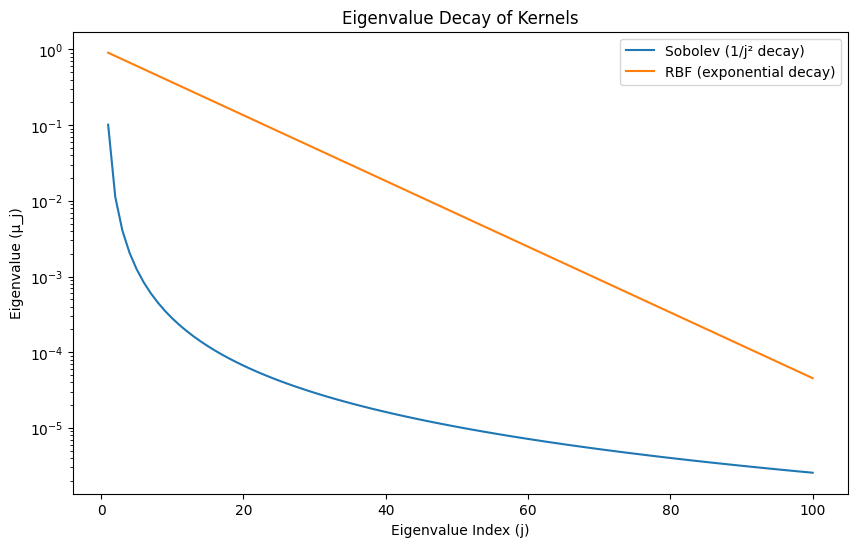

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Eigenvalues for different kernels
n = 100
x = np.arange(1, n+1)

# Sobolev (1/j^2 decay)
sobolev = 1 / (np.pi**2 * (2*x - 1)**2)

# RBF (exponential decay)
gamma = 0.1
rbf = np.exp(-gamma * x)

# Plot eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(x, sobolev, label='Sobolev (1/j² decay)')
plt.plot(x, rbf, label='RBF (exponential decay)')
plt.yscale('log')
plt.xlabel('Eigenvalue Index (j)')
plt.ylabel('Eigenvalue (µ_j)')
plt.title('Eigenvalue Decay of Kernels')
plt.legend()
plt.show()

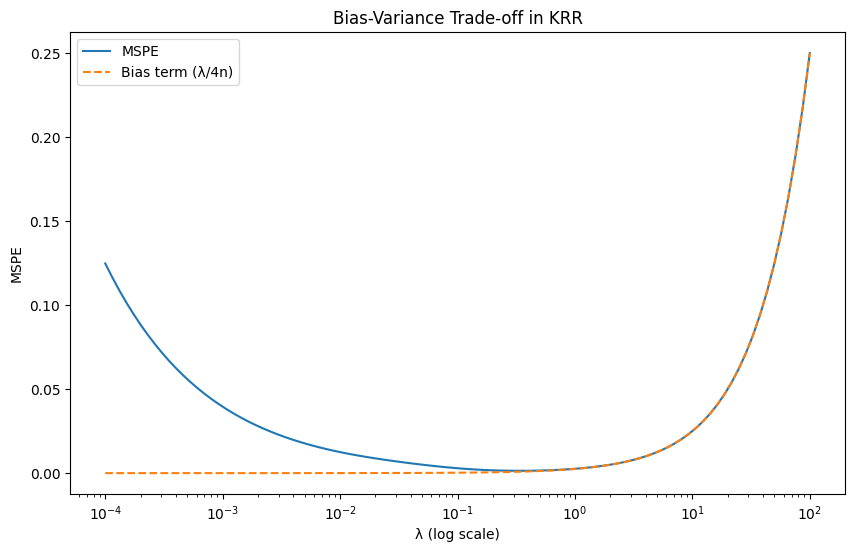

In [11]:
def MSPE(d, sigma_sq=1, lambda_vals=np.logspace(-4, 2, 100)):
    variance = sigma_sq * np.sum(d**2 / (d + lambda_vals.reshape(-1, 1))**2, axis=1) / len(d)
    bias = lambda_vals / (4 * len(d))
    return variance + bias

# Simulate eigenvalues (Sobolev-like decay)
d = 1 / (np.pi**2 * (2*np.arange(1, 101) - 1)**2)
lambda_vals = np.logspace(-4, 2, 100)
mspe = MSPE(d, sigma_sq=1, lambda_vals=lambda_vals)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(lambda_vals, mspe, label='MSPE')
plt.plot(lambda_vals, 1/(4*len(d)) * lambda_vals, '--', label='Bias term (λ/4n)')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('MSPE')
plt.title('Bias-Variance Trade-off in KRR')
plt.legend()
plt.show()